In [12]:
import pandas as pd
import numpy as np
import os

Read raw test and train data. As in submission file I need Ids, I will save IDs for future use

In [2]:
train_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/test_data.csv")

IDS = test_data["ID"]

Read featuresets 1-6 which is generated from feature engineering notebook

In [3]:
# reg
tr1 = pd.read_csv("featuresets/tr1.csv")
ts1 = pd.read_csv("featuresets/ts1.csv")

# mean
tr2 = pd.read_csv("featuresets/tr2.csv")
ts2 = pd.read_csv("featuresets/ts2.csv")

#knn
tr3 = pd.read_csv("featuresets/tr3.csv")
ts3 = pd.read_csv("featuresets/ts3.csv")

#rfr
tr4 = pd.read_csv("featuresets/tr4.csv")
ts4 = pd.read_csv("featuresets/ts4.csv")

#gbm
tr5 = pd.read_csv("featuresets/tr5.csv")
ts5 = pd.read_csv("featuresets/ts5.csv")

#average
tr6 = pd.read_csv("featuresets/tr6.csv")
ts6 = pd.read_csv("featuresets/ts6.csv")

get_train_test function is used to extract train data, labels and test data from featuresets

In [4]:
# Unnamed: 0 is a column introduced by panda while reading files. It is just a row number so discarding it
def get_train_test(tr,ts):
    y = tr["Footfall"]
    x_train = tr.drop(["Footfall","Unnamed: 0"],1)
    x_test = ts.drop("Unnamed: 0",1)
    return(x_train,y,x_test)

In [5]:
x_train1 , y1 ,x_test1 = get_train_test(tr1,ts1)
x_train2 , y2 ,x_test2 = get_train_test(tr2,ts2)
x_train3 , y3 ,x_test3 = get_train_test(tr3,ts3)
x_train4 , y4 ,x_test4 = get_train_test(tr4,ts4)
x_train5 , y5 ,x_test5 = get_train_test(tr5,ts5)
x_train6 , y6 ,x_test6 = get_train_test(tr6,ts6)

write_csv is a function to save predictions which can be submitted on analytics vidhya

In [6]:
def write_csv(folder,fileName,df):
    if os.path.isdir(folder) == False:
        os.makedirs(folder)
    sample_sub = df[['ID','Footfall']]
    sample_sub.to_csv(folder+"/sample_submissions_"+fileName+".csv",sep=",")

predict is the generalized function used to predict over test data and write predictions in comma separated files

In [7]:
def predict(model,approach,name,t_data,IDs):
    out_df = pd.DataFrame()
    out_df['Footfall'] = model.predict(t_data)
    out_df['ID'] = IDs
    write_csv("results/" + approach,name,out_df)
    return(out_df['Footfall'])

In [8]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import ElasticNetCV,RidgeCV,LassoCV,SGDRegressor,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_predict

/home/achal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1. GBM

In [9]:
params1 = params_gbm = {'n_estimators': 500, 'max_depth': 4,
          'learning_rate': 0.1, 'loss': 'ls'}
params2 = params_gbm = {'n_estimators': 1000, 'max_depth': 5,
          'learning_rate': 0.1, 'loss': 'ls'}
params3 = params_gbm = {'n_estimators': 1500, 'max_depth': 4,
          'learning_rate': 0.05, 'loss': 'ls'}
params4 = params_gbm = {'n_estimators': 1500, 'max_depth': 5,
          'learning_rate': 0.05, 'loss': 'ls'}
params5 = params_gbm = {'n_estimators': 1000, 'max_depth': 4,
          'learning_rate': 0.06, 'loss': 'ls'}
params6 = params_gbm = {'n_estimators': 1000, 'max_depth': 5,
          'learning_rate': 0.06, 'loss': 'ls'}
params7 = params_gbm = {'n_estimators': 800, 'max_depth': 4,
          'learning_rate': 0.11, 'loss': 'ls'}
params8 = params_gbm = {'n_estimators': 800, 'max_depth': 5,
          'learning_rate': 0.11, 'loss': 'ls'}
params9 = params_gbm = {'n_estimators': 1200, 'max_depth': 4,
          'learning_rate': 0.07, 'loss': 'ls'}
params10 = params_gbm = {'n_estimators': 1200, 'max_depth': 5,
          'learning_rate': 0.07, 'loss': 'ls'}

gbm1 = GradientBoostingRegressor(**params1,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm2 = GradientBoostingRegressor(**params2,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm3 = GradientBoostingRegressor(**params3,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm4 = GradientBoostingRegressor(**params4,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm5 = GradientBoostingRegressor(**params5,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm6 = GradientBoostingRegressor(**params6,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm7 = GradientBoostingRegressor(**params7,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm8 = GradientBoostingRegressor(**params8,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm9 = GradientBoostingRegressor(**params9,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)
gbm10 = GradientBoostingRegressor(**params10,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)

In [10]:
gbm1.fit(x_train1,y1)
gbm2.fit(x_train2,y2)
gbm3.fit(x_train3,y3)
gbm4.fit(x_train4,y4)
gbm5.fit(x_train6,y6)
gbm6.fit(x_train1,y1)
gbm7.fit(x_train2,y2)
gbm8.fit(x_train3,y3)
gbm9.fit(x_train4,y4)
gbm10.fit(x_train6,y6)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       57998.9835        3716.5743           32.87s
         2       54754.9588        3052.0278           30.71s
         3       51642.0769        3159.2980           29.21s
         4       49079.3707        2566.2222           29.23s
         5       47121.2326        1913.1379           28.51s
         6       45123.9728        1983.5710           27.99s
         7       42897.3007        2260.1386           27.36s
         8       40840.2013        2015.3250           27.09s
         9       38838.9774        2101.5728           27.33s
        10       37083.2431        1770.7231           26.94s
        20       25959.3796         874.8431           25.44s
        30       21137.2872         252.9421           24.14s
        40       18620.5496         128.9101           23.47s
        50       17117.4733         104.2233           22.78s
        60       15767.7580          40.7403           22.18s
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.07, loss='ls', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=200, min_weight_fraction_leaf=0.0,
             n_estimators=1200, presort='auto', random_state=10,
             subsample=0.8, verbose=1, warm_start=False)

In [14]:
gbm_out1 = predict(gbm1,"approach1","gbr1",x_test1,IDS)
gbm_out2 = predict(gbm2,"approach1","gbr2",x_test2,IDS)
gbm_out3 = predict(gbm3,"approach1","gbr3",x_test3,IDS)
gbm_out4 = predict(gbm4,"approach1","gbr4",x_test4,IDS)
gbm_out5 = predict(gbm5,"approach1","gbr5",x_test6,IDS)
gbm_out6 = predict(gbm6,"approach1","gbr6",x_test1,IDS)
gbm_out7 = predict(gbm7,"approach1","gbr7",x_test2,IDS)
gbm_out8 = predict(gbm8,"approach1","gbr8",x_test3,IDS)
gbm_out9 = predict(gbm9,"approach1","gbr9",x_test4,IDS)
gbm_out10 = predict(gbm10,"approach1","gbr10",x_test6,IDS)

**After submitting all the models on analytics vidhya, I found out that GBR 4,5,8,9 are working good with the given parameters**

Lets try to bag them by taking average of these 4 models and lets see if score improves

In [15]:
out_df = pd.DataFrame()
out_df['Footfall'] = (gbm_out4 + gbm_out5 + gbm_out8 + gbm_out9)/4
out_df['ID'] = IDS
write_csv("results/approach1","gbm_combined",out_df)

It improved public score significally LB ~ 128. so lets try to predict over all the featuresets by using best gbr model. (Model - 9)

In [16]:
gbm9

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.07, loss='ls', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=200, min_weight_fraction_leaf=0.0,
             n_estimators=1200, presort='auto', random_state=10,
             subsample=0.8, verbose=1, warm_start=False)

**Note: ** I don't want to leak the data, so I am not including featureset in which missing values are predicted using gradient boosting regressor

In [17]:
gbm9.fit(x_train1,y1)
gbm_out11 = predict(gbm9,"approach1","gbr91",x_test1,IDS)

gbm9.fit(x_train2,y2)
gbm_out12 = predict(gbm9,"approach1","gbr92",x_test2,IDS)

gbm9.fit(x_train3,y3)
gbm_out13 = predict(gbm9,"approach1","gbr93",x_test3,IDS)

gbm9.fit(x_train4,y4)
gbm_out14 = predict(gbm9,"approach1","gbr94",x_test4,IDS)

gbm9.fit(x_train6,y6)
gbm_out15 = predict(gbm9,"approach1","gbr95",x_test6,IDS)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       59085.9830        2642.9978            1.30m
         2       56665.6601        2234.9656            1.21m
         3       54312.4111        2414.1881            1.16m
         4       52230.1275        2066.7512            1.21m
         5       50619.5347        1572.6736            1.23m
         6       48925.3212        1694.8392            1.21m
         7       47038.7926        1921.8720            1.18m
         8       45586.3630        1399.0576            1.18m
         9       43768.8297        1915.7022            1.15m
        10       42166.6958        1642.6997            1.13m
        20       30995.7361         937.6667            1.06m
        30       25129.0960         301.8151            1.03m
        40       21637.9503         161.9251            1.01m
        50       19528.7664         164.4590            1.09m
        60       17785.3394          59.6953            1.13m
       

In [18]:
out_df = pd.DataFrame()
out_df['Footfall'] = (gbm_out11 + gbm_out12 + gbm_out13 + gbm_out14 + gbm_out15 )/5
out_df['ID'] = IDS
write_csv("results/approach1","gbm9_combined",out_df)

It gave LB score around 129. (Best score till now ~ 128). So lets do something better

Lets try to analyze feature imporance calculated by gradient boosing regressor

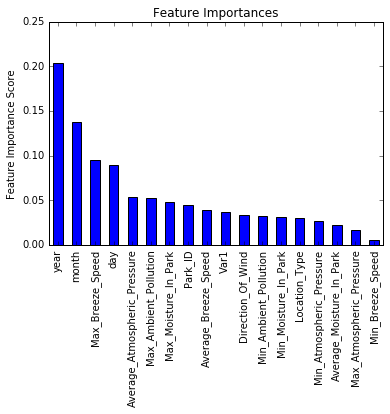

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
feat_imp = pd.Series(gbm9.feature_importances_, x_train1.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

### I have only focused on gradient boosting regressor till now and spent enough time to tune GBR. Lets try different machine learning algorithms

## 2. Random forest regressor

Lets build random forest regressor using top parameters. I used grid search to tune these parameters. Here also, I don't want any data leakage so I will not train rfr on featureset 4

In [20]:
rfr1 = RandomForestRegressor(max_features="sqrt",max_depth=4,random_state=10,n_estimators=200)
rfr2 = RandomForestRegressor(max_features="sqrt",max_depth=5,random_state=10,n_estimators=200)
rfr3 = RandomForestRegressor(max_features="sqrt",max_depth=4,random_state=10,n_estimators=200)
rfr4 = RandomForestRegressor(max_features="sqrt",max_depth=5,random_state=10,n_estimators=200)
rfr5 = RandomForestRegressor(max_features="sqrt",max_depth=4,random_state=10,n_estimators=200)

In [21]:
rfr1.fit(x_train1,y1)
rfr2.fit(x_train2,y2)
rfr3.fit(x_train3,y3)
rfr4.fit(x_train5,y5)
rfr5.fit(x_train6,y6)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=10,
           verbose=0, warm_start=False)

In [22]:
rfr_out1 = predict(rfr1,"approach2","rfr1",x_test1,IDS)
rfr_out2 = predict(rfr2,"approach2","rfr2",x_test2,IDS)
rfr_out3 = predict(rfr3,"approach2","rfr3",x_test3,IDS)
rfr_out4 = predict(rfr4,"approach2","rfr4",x_test5,IDS)
rfr_out5 = predict(rfr5,"approach2","rfr5",x_test6,IDS)

Random forest regressor performed worse than gradient boosting regressor. But some of the rfr models performed close enough to gradient boosting regressor.

Before considering these models, lets see what happens if I take average of all the stage 0 models I built till now

In [23]:
out_df = pd.DataFrame()
out_df['Footfall'] = (gbm_out1 + gbm_out2 + gbm_out3 + gbm_out4 + gbm_out5 + 
                      gbm_out6 + gbm_out7 + gbm_out8 + gbm_out9 + gbm_out10+ 
                      rfr_out1 + rfr_out2 + rfr_out3 + rfr_out4 + rfr_out5)/15
out_df['ID'] = IDS
write_csv("results/approach2","gbm_rfr_combined",out_df)

LB ~ 142. (Best LB score till now ~ 128, so it did not work for me) 

In [24]:
out_df = pd.DataFrame()
out_df['Footfall'] = (gbm_out4 + gbm_out5 + gbm_out8 + gbm_out9 + rfr_out3 + rfr_out5)/6
out_df['ID'] = IDS
write_csv("results/approach2","gbm_rfr_best_combined",out_df)

LB ~ 132. (Best LB score till now ~ 128, so it is still worse than best score) 

## 3. Extra trees regressor

In [25]:
etr1 = ExtraTreesRegressor(max_features="sqrt",max_depth=4,random_state=10,n_estimators=300)
etr2 = ExtraTreesRegressor(max_features="sqrt",max_depth=5,random_state=10,n_estimators=400)
etr3 = ExtraTreesRegressor(max_features="sqrt",max_depth=4,random_state=10,n_estimators=300)
etr4 = ExtraTreesRegressor(max_features="sqrt",max_depth=5,random_state=10,n_estimators=200)
etr5 = ExtraTreesRegressor(max_features="sqrt",max_depth=4,random_state=10,n_estimators=300)
etr6 = ExtraTreesRegressor(max_features="sqrt",max_depth=4,random_state=10,n_estimators=400)

In [26]:
etr1.fit(x_train1,y1)
etr2.fit(x_train2,y2)
etr3.fit(x_train3,y3)
etr4.fit(x_train4,y4)
etr5.fit(x_train5,y5)
etr6.fit(x_train6,y6)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=400, n_jobs=1, oob_score=False, random_state=10,
          verbose=0, warm_start=False)

In [27]:
etr_out1 = predict(etr1,"approach3","etr1",x_test1,IDS)
etr_out2 = predict(etr2,"approach3","etr2",x_test2,IDS)
etr_out3 = predict(etr3,"approach3","etr3",x_test3,IDS)
etr_out4 = predict(etr4,"approach3","etr4",x_test4,IDS)
etr_out5 = predict(etr5,"approach3","etr5",x_test5,IDS)
etr_out6 = predict(etr6,"approach3","etr6",x_test6,IDS)

In [28]:
out_df = pd.DataFrame()
out_df['Footfall'] = (gbm_out1 + gbm_out2 + gbm_out3 + gbm_out4 + gbm_out5 + 
                      gbm_out6 + gbm_out7 + gbm_out8 + gbm_out9 + gbm_out10+ 
                      rfr_out1 + rfr_out2 + rfr_out3 + rfr_out4 + rfr_out5 +
                     etr_out1 + etr_out2 + etr_out3 + etr_out4 +etr_out5 + etr_out6)/31
out_df['ID'] = IDS
write_csv("results/approach3","gbm_rfr_etr_combined",out_df)

In [29]:
out_df = pd.DataFrame()
out_df['Footfall'] = (gbm_out11 + gbm_out12 + gbm_out13 + gbm_out14 + gbm_out15 + 
                      rfr_out3 + rfr_out5 + etr_out3 + etr_out5)/7
out_df['ID'] = IDS
write_csv("results/approach3","gbm_rfr_etr_best_combined",out_df)

I tried extra trees regressor single models, combined with gbms, combined with rfr and gbms but still it did not beat my public LB score

**Its time to implement stacking with the best rfr and etr models worked for me along with all 10 gbm models**

## 4. Stacking with GBMs

In [30]:
models = [gbm1,gbm2,gbm3,gbm4,gbm5,gbm6,gbm7,gbm8,gbm9,gbm10,rfr3,rfr5,etr2]
modelNames = ["gbm1","gbm2","gbm3","gbm4","gbm5","gbm6","gbm7","gbm8","gbm9","gbm10","rfr3","rfr5","etr2"]

In [31]:
stage0_final_train = pd.DataFrame()
stage0_final_test = pd.DataFrame()

train_dataset = [x_train1,x_train2,x_train3,x_train4,x_train5,x_train6]
labels = [y1,y2,y3,y4,y5,y6]
test_dataset = [x_test1,x_test2,x_test3,x_test4,x_test5,x_test6]

I will generate cross validation predictions using all the best models worked for me. I will pick featureset based on random number between 0 to 5.

In [32]:
from random import randint

In [33]:
for model,modelName in zip(models,modelNames):
    print(modelName)
    rnd = randint(0,6)
    stage0_final_train[modelName] = cross_val_predict(model,train_dataset[rnd],labels[rnd],cv=5)
    model.fit(train_dataset[rnd],labels[rnd])
    stage0_final_test[modelName] = model.predict(test_dataset[rnd])

gbm1
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       58262.2414        5160.5712           27.99s
         2       54946.2789        3227.7307           27.12s
         3       52535.5999        2579.4598           26.35s
         4       49504.1340        3248.9530           26.09s
         5       47045.6470        2189.0374           26.87s
         6       44783.3222        2271.8128           26.26s
         7       42762.9540        2029.0562           25.97s
         8       41302.8789        1563.2390           25.57s
         9       39617.7171        1767.9550           26.08s
        10       38235.6597        1129.3181           25.71s
        20       28784.4175         447.9311           24.20s
        30       24380.8536         217.4654           25.83s
        40       21592.6398         101.2717           24.05s
        50       18804.1244          87.0099           23.38s
        60       17607.9604          83.9658           22.30s
  

In [34]:
stage0_final_train.to_csv("stage0_train_data.csv")
stage0_final_test.to_csv("stage0_test_data.csv")

In [36]:
stage0_final_train.head(5)

,gbm1,gbm2,gbm3,gbm4,gbm5,gbm6,gbm7,gbm8,gbm9,gbm10,rfr3,rfr5,etr2
0,1417.199720,1392.156690,1398.896509,1392.579523,1428.321133,1393.254771,1429.603526,1429.444886,1415.002550,1397.983830,1209.584803,1210.637860,1170.342951
1,1293.343223,1377.903433,1330.968018,1290.240414,1263.214223,1342.207154,1236.231778,1383.708627,1353.423951,1362.103674,1240.997244,1243.033515,1211.548358
2,1377.667083,1348.741872,1352.448754,1351.806009,1372.983687,1366.117514,1345.874295,1325.368641,1393.511641,1335.130239,1245.805321,1226.637910,1254.292396
3,1316.859882,1274.255273,1269.797217,1258.137301,1269.669649,1273.395719,1233.365746,1188.221537,1289.937532,1312.209231,1319.112987,1294.551933,1260.193332
4,1418.342634,1304.211679,1362.333806,1317.798596,1385.117611,1406.381076,1331.092621,1277.814377,1350.180668,1388.598531,1353.236858,1332.734878,1277.920273


In [37]:
params_stage1 = params_gbm = {'n_estimators': 200, 'max_depth': 5,'learning_rate': 0.02, 'loss': 'ls'}
gbm_stage1 = GradientBoostingRegressor(**params_stage1,verbose=1,subsample=0.8,random_state=10,max_features="sqrt",min_samples_split=200)

gbm_stage1.fit(stage0_final_train,y1)
ensemble_out1 = predict(gbm_stage1,"approach4","stacking_gbm",stage0_final_test,IDS)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1       59556.2582        2186.5738           18.79s
         2       57277.9744        2144.4481           17.39s
         3       55325.1883        2039.0402           17.56s
         4       53292.1932        1977.1175           17.16s
         5       51435.0777        1880.9847           16.69s
         6       49648.4775        1810.5167           16.85s
         7       47935.0069        1735.6009           16.85s
         8       46214.7869        1668.5637           16.52s
         9       44697.6660        1591.4291           16.48s
        10       43258.3881        1527.5784           16.33s
        20       30745.1427        1017.4269           16.09s
        30       22307.2686         693.4508           15.27s
        40       16775.2319         466.8125           14.03s
        50       13018.2916         311.8996           12.91s
        60       10470.2042         208.9733           11.88s
       

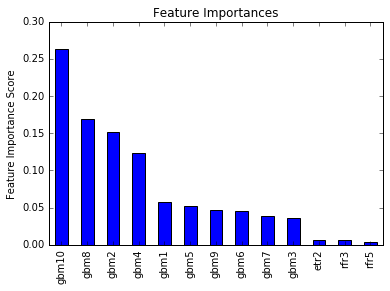

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline
feat_imp = pd.Series(gbm_stage1.feature_importances_, stage0_final_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [39]:
from xgboost import XGBRegressor
s1_train = stage0_final_train.drop(["gbm1","gbm2","gbm7","etr2"],1)
s1_test  = stage0_final_test.drop(["gbm1","gbm2","gbm7","etr2"],1)

In [40]:
xgb_model = XGBRegressor(n_estimators=500,max_depth=4,learning_rate=0.01)
xgb_model.fit(s1_train,y1)
ensemble_out2 = predict(xgb_model,"approach4","xgb_stage1",s1_train,IDS)

In [41]:
out_df = pd.DataFrame()
out_df['Footfall'] = (ensemble_out1 + ensemble_out2)/2
out_df['ID'] = IDS
write_csv("results/approach4","stage1_xgb_gbm_combined",out_df)

**Final model public LB ~ 122 LS and private LB ~ 96**

**Final rank on private leader board :- 34**